In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 

In [3]:
data=pd.read_csv("result.csv")

思考回答
这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号    
1.散点图 用来显示两个变量的数值（每个轴上显示一个变量），并检测两个变量之间的关系或相关性是否存在。
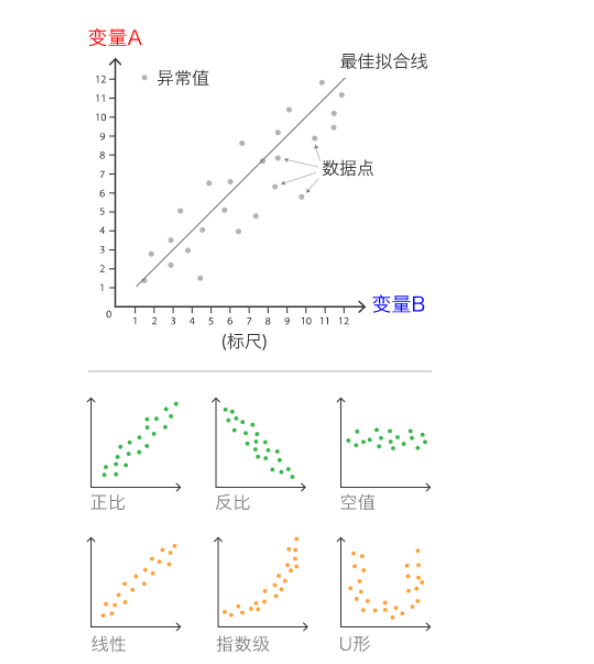
2.热图 通过色彩变化来显示数据，当应用在表格时，热图适合用来交叉检查多变量的数据。
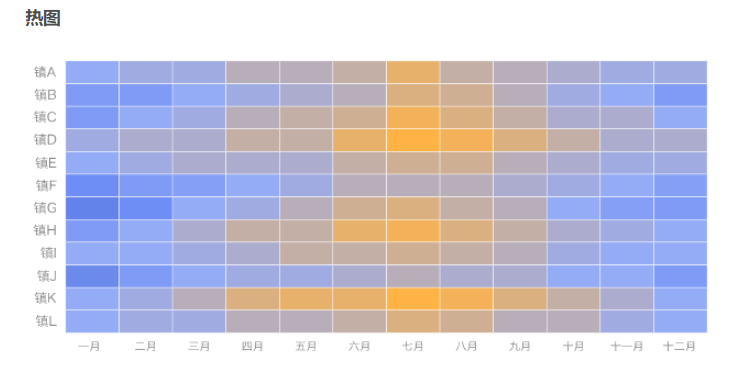
3.饼图(Pie Chart)  把一个圆圈划分成不同比例的分段，以展示各个类别之间的比例
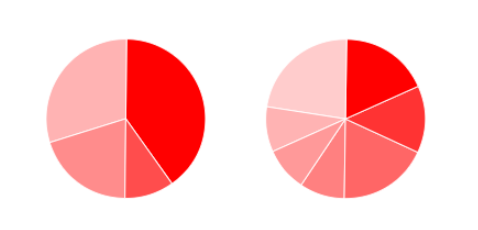
4.条形图(Bar Chart) 用于可视化不同数据的数量或频率的对比。
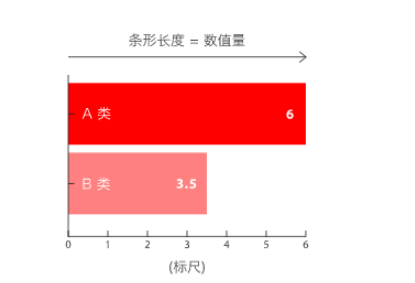
5.直方图 适合用来显示在连续间隔或特定时间段内的数据分布，有助于估计数值集中位置、上下限值以及确定是否存在差距或异常值。
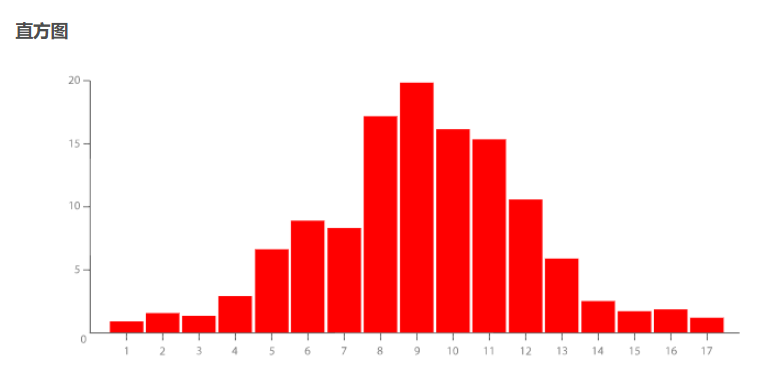
4.折线图 用于在连续间隔或时间跨度上显示定量数值，最常用来显示趋势和关系。
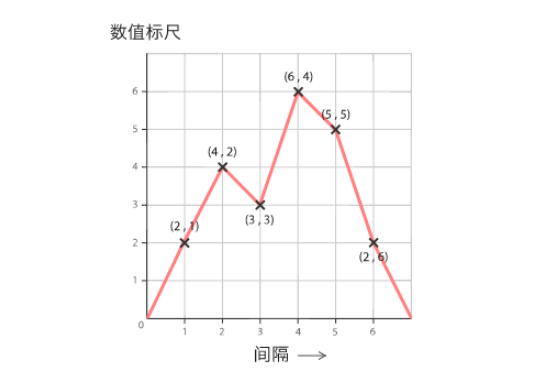
5.扇形图 用于可视化各部分所占比例。
6.箱形图 能方便显示数字数据组的四分位数，可以垂直或水平的形式出现。
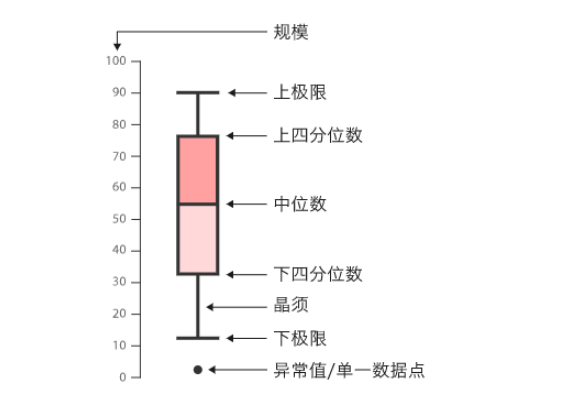

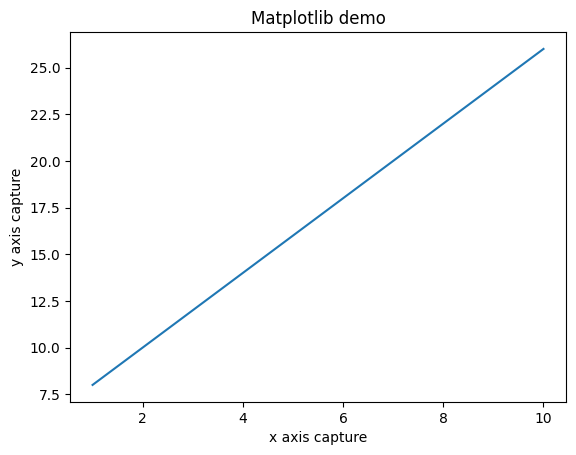

In [7]:
x=np.arange(1,11)
y=2*x+6
plt.title("Matplotlib demo")
plt.xlabel("x axis capture")
plt.ylabel("y axis capture")
plt.plot(x,y)
plt.show()

In [4]:
data.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


matplotlib.pyplot:https://matplotlib.org/stable/api/pyplot_summary.html

In [5]:
#可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）
data1=data.groupby(data["Sex"])[['Survived']].sum()
data1

,Survived
Sex,
female,233
male,109


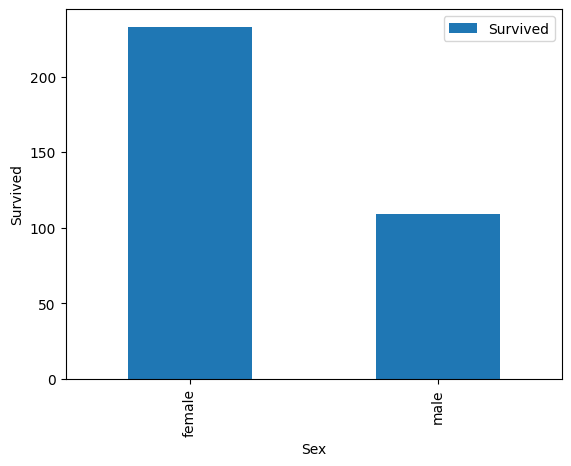

In [6]:
data1.plot.bar()
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

In [21]:
#计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示
data2=data[data['Survived']==0]
data3=data2.groupby('Sex')[['Survived']].count().rename(columns = {"Survived":"Death_sum"})
data3

,Death_sum
Sex,
female,81
male,468


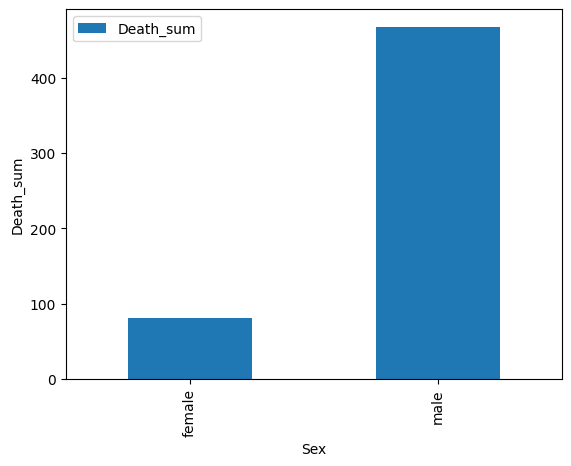

In [24]:
data3.plot.bar()
plt.xlabel('Sex')
plt.ylabel('Death_sum')
plt.show()

In [32]:
data.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [35]:
#unstack()函数是根据列名进行分类，而stack函数是根据index标签进行了分类
sex_survived=data.groupby(['Sex','Survived'])['Survived'].count().unstack()
sex_survived

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Sex'>

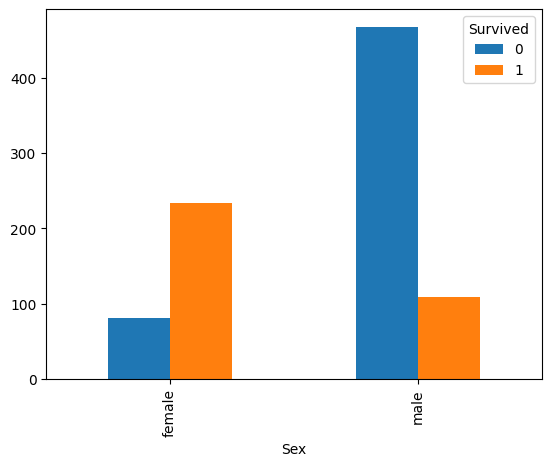

In [36]:
#可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图
sex_survived.plot.bar()

In [39]:
#可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况
Fare_survied=data.groupby(['Fare','Survived'])['Survived'].count().unstack()
Fare_survied

Survived,0,1
Fare,,
0.0000,14.0,1.0
4.0125,1.0,NaN
5.0000,1.0,NaN
6.2375,1.0,NaN
6.4375,1.0,NaN
...,...,...
227.5250,1.0,3.0
247.5208,1.0,1.0
262.3750,NaN,2.0


<AxesSubplot:xlabel='Fare'>

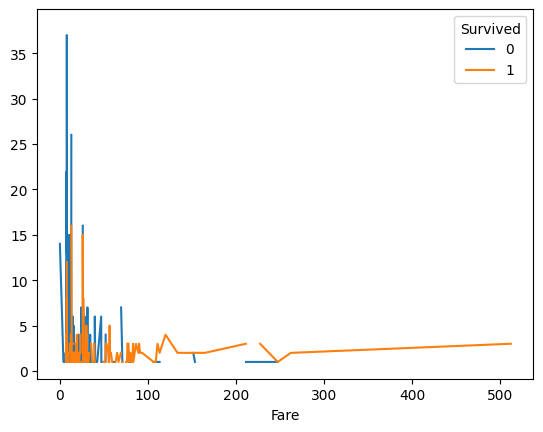

In [42]:
#可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）
Fare_survied.plot()

In [43]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）
pclass=data.groupby(['Pclass','Survived'])['Survived'].count().unstack()
pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


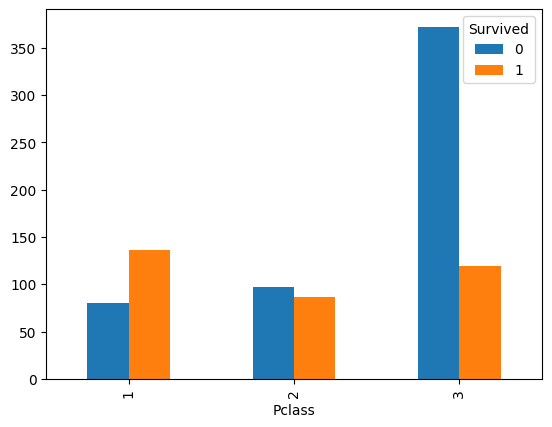

In [44]:
pclass.plot.bar()
plt.show()

In [46]:
#可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)
age=data.groupby(['Age','Survived'])['Survived'].count().unstack()
age

Survived,0,1
Age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,NaN,2.0
0.83,NaN,2.0
0.92,NaN,1.0
...,...,...
70.00,2.0,NaN
70.50,1.0,NaN
71.00,2.0,NaN


<AxesSubplot:xlabel='Age'>

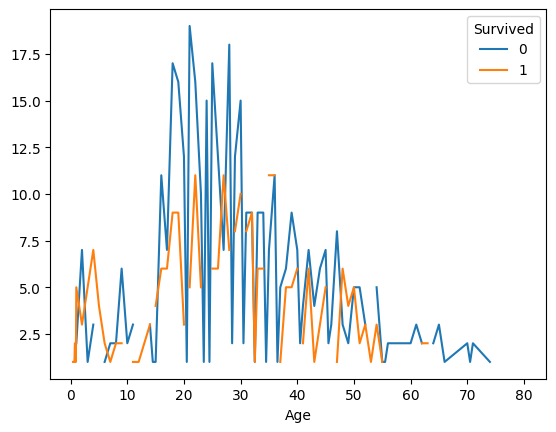

In [48]:
age.plot()

In [62]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）
age=data.groupby(['Pclass','Age'])['Age'].count().unstack()
age

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Pclass,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,...,3.0,1.0,2.0,2.0,NaN,1.0,NaN,2.0,NaN,1.0
2,NaN,1.0,NaN,2.0,NaN,2.0,2.0,3.0,2.0,1.0,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
3,1.0,NaN,2.0,NaN,NaN,5.0,7.0,3.0,7.0,3.0,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN


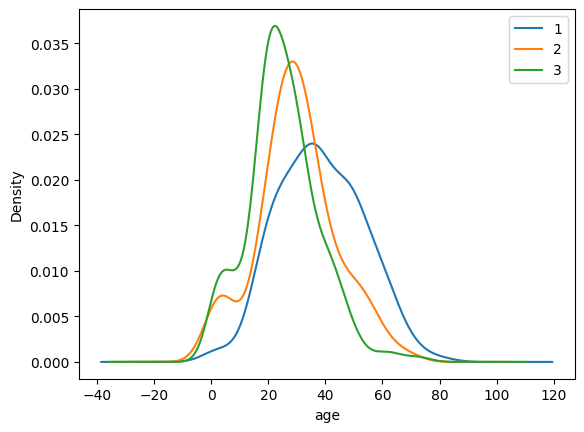

In [63]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）
#调用plot时加上kind='kde'即可生成一张密度图
data.Age[data.Pclass==1].plot(kind='kde')
data.Age[data.Pclass==2].plot(kind='kde')
data.Age[data.Pclass==3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")